In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')

In [4]:
b_hhold_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [5]:
b_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [6]:
b_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,NaN,16,NaN,NaN,NaN,98,-18,...,NaN,15.0,-15927.0,2,-4,1,66.0,-59,NaN,100
18973,34,-2,92,NaN,16,NaN,NaN,NaN,-7,-38,...,NaN,21.0,NaN,2,-4,1,21.0,-59,NaN,75
20151,34,313,97,NaN,24,NaN,NaN,NaN,308,-10,...,NaN,66.0,NaN,2,-10,1,NaN,1,NaN,150
5730,58,138,-64,NaN,24,150.0,NaN,305.0,133,-48,...,NaN,36.0,NaN,2,-184,1,NaN,-59,-506.0,100
35033,122,68,-54,NaN,24,0.0,NaN,5.0,63,-28,...,NaN,15.0,NaN,2,-244,1,NaN,-39,-6.0,50


In [7]:
b_hhold_train["wJthinfa"].dtype

dtype('int64')

In [8]:
from pandas.api.types import is_numeric_dtype

In [9]:
def impute_vals(df):
    for column in df.columns:
        if(is_numeric_dtype(df[column])):
            df[column].fillna(df[column].mean(), inplace=True)
    
    return df

In [10]:
b_filled = impute_vals(b_hhold_train)

In [11]:
b_filled.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,-7.509967,16,158.354633,-33.279775,301.10623,98,-18,...,0.647059,15.0,-15927.000000,2,-4,1,66.000000,-59,-339.568291,100
18973,34,-2,92,-7.509967,16,158.354633,-33.279775,301.10623,-7,-38,...,0.647059,21.0,-15965.135338,2,-4,1,21.000000,-59,-339.568291,75
20151,34,313,97,-7.509967,24,158.354633,-33.279775,301.10623,308,-10,...,0.647059,66.0,-15965.135338,2,-10,1,45.782178,1,-339.568291,150
5730,58,138,-64,-7.509967,24,150.000000,-33.279775,305.00000,133,-48,...,0.647059,36.0,-15965.135338,2,-184,1,45.782178,-59,-506.000000,100
35033,122,68,-54,-7.509967,24,0.000000,-33.279775,5.00000,63,-28,...,0.647059,15.0,-15965.135338,2,-244,1,45.782178,-39,-6.000000,50


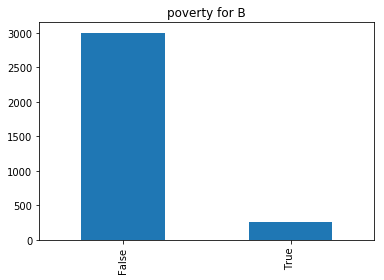

In [12]:
b_filled.poor.value_counts().plot.bar(title="poverty for B")

In [13]:
b_filled_Y = b_filled.poor

In [14]:
b_filled.drop('poor', axis=1, inplace=True)

In [15]:
b_filled_Y.head()

id
57071    False
18973    False
20151    False
5730     False
35033    False
Name: poor, dtype: bool

In [16]:
from imblearn.over_sampling import SMOTE

In [18]:
from preprocess_util import pre_process_data

In [19]:
b_filledX = pre_process_data(b_filled)

input shape	(3255, 441)
After standardization	(3255, 441)
After one hot encoding of categoricals	(3255, 1432)


In [20]:
bX_resampled, bY_resampled = SMOTE().fit_sample(b_filledX, b_filled_Y)

In [21]:
from collections import Counter

In [38]:
bX_resampled = bX_resampled.T
bX_resampled.shape

(1432, 6008)

In [23]:
print(Counter(bY_resampled).items())

dict_items([(False, 3004), (True, 3004)])


In [24]:
bY_resampled = bY_resampled.reshape(1, 6008)

In [25]:
bY_resampled.shape

(1, 6008)

In [26]:
b_filled.columns

Index(['RzaXNcgd', 'LfWEhutI', 'jXOqJdNL', 'wJthinfa', 'PTLgvdlQ', 'ZvEApWrk',
       'euTESpHe', 'bDVMMSYY', 'aSzMhjgD', 'ZehDbxxy',
       ...
       'YVMuyCUV', 'AZVtosGB', 'toZzckhe', 'BkiXyuSp', 'ggucvVUs', 'VMvwrYds',
       'VlNidRNP', 'rljjAmaN', 'ChbSWYhO', 'country'],
      dtype='object', length=441)

# MODEL

In [27]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [30,1432], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [15,30], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b2 = tf.get_variable("b2", [15,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,15], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [28]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    
    return Z3

In [29]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y

In [30]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [31]:
def fit(xtrain, ytrain, alpha=0.001, epochs=1000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    tf.set_random_seed(1)
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(alpha))
        plt.show()

        # Calculate accuracy on the train set
        accuracy = get_cost(z, Y)

        print ("Train Accuracy:", accuracy.eval({X: xtrain, Y: ytrain}))
        
        
        return parameters

In [32]:
def predict_final(parameters, X):
    '''compute the class probability of the neural network given the trained model params'''
    num_xtest = X.shape[0]
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    x_test = tf.placeholder('float', [num_xtest, None])
    Z = predict(params, x_test)
    A = tf.nn.sigmoid(Z)
    
    with tf.Session() as sess:
        predictions = sess.run(A, feed_dict={x_test:X})
    return predictions

At Epoch 0, Cost is 0.728599488735199
At Epoch 100, Cost is 0.6114202737808228
At Epoch 200, Cost is 0.5669876933097839
At Epoch 300, Cost is 0.5385904908180237
At Epoch 400, Cost is 0.5184749960899353


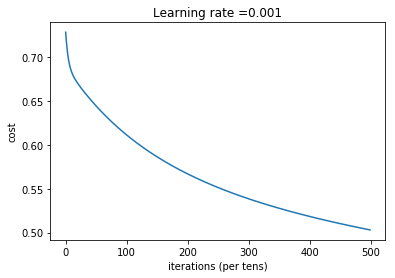

Train Accuracy: 0.5029683


In [39]:
B_params = fit(bX_resampled, bY_resampled, epochs=500)

In [40]:
b_test = pd.read_csv("data/B_hhold_test.csv", index_col='id')

In [41]:
b_test = impute_vals(b_test)

In [42]:
b_test = b_test.fillna(0)

In [43]:
b_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 9135 to 52739
Columns: 441 entries, RzaXNcgd to country
dtypes: float64(9), int64(14), object(418)
memory usage: 5.4+ MB


In [44]:
b_filledX.columns

Index(['wJthinfa', 'ZvEApWrk', 'vuQrLzvK', 'FGWqGkmD', 'qrOrXLPM', 'BXOWgPgL',
       'umkFMfvA', 'McFBIGsm', 'NjDdhqIe', 'rCVqiShm',
       ...
       'rljjAmaN_akDoa', 'rljjAmaN_fEsQq', 'rljjAmaN_gPPdN', 'ChbSWYhO_BgSQe',
       'ChbSWYhO_Enull', 'ChbSWYhO_LgZDV', 'ChbSWYhO_OPpaN', 'ChbSWYhO_fWqni',
       'ChbSWYhO_zmaYX', 'country_B'],
      dtype='object', length=1432)

In [45]:
b_test = pre_process_data(b_test, enforce_cols=b_filledX.columns)

input shape	(1604, 441)
After standardization	(1604, 441)
After one hot encoding of categoricals	(1604, 1419)


In [46]:
b_test.head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,euTESpHe_zVwQw,jueNqsUo_iMkzP,kmXNWkcV_WklDI,knRcLhxE_jUKCa,mMDEItQt_vSoYe,pKbELQat_xiPTV,qJMRBMxu_uBCoo,tkkjBJlG_QUfCR,uHXkmVcG_hZDNP,yZSARGEo_zfzTV
id,,,,,,,,,,,,,,,,,,,,,
9135,-0.749544,-0.719298,0.935719,9.618231e-01,-0.926144,-2.625072e-01,-7.967168e-14,-6.359296e-01,-0.685444,0.563975,...,0,0,0,0,0,0,0,0,0,0
117,0.615895,0.371780,0.795240,-2.153636e-14,0.241729,8.601754e-01,-7.967168e-14,8.853570e-01,0.399661,-0.202876,...,0,0,0,0,0,0,0,0,0,0
29085,-0.749544,-0.537452,-1.887912,-2.153636e-14,0.241729,-9.361168e-01,-7.967168e-14,1.605035e-02,-0.504593,0.563975,...,0,0,0,0,0,0,0,0,0,0
55442,0.274535,0.068703,0.373802,-2.385624e-01,1.409603,-4.594832e-15,-7.967168e-14,2.058932e-15,0.098243,0.372262,...,0,0,0,0,0,0,0,0,0,0
29281,0.615895,-0.234375,0.865480,9.618231e-01,0.241729,-1.385190e+00,-7.967168e-14,1.102684e+00,-0.203175,0.563975,...,0,0,0,0,0,0,0,0,0,0


In [47]:
b_test = b_test.transpose()
b_test.head()

id,9135,117,29085,55442,29281,63854,87565,64033,395,64544,...,45834,80366,71375,35744,46099,30519,64794,33971,28104,52739
wJthinfa,-0.749544,6.158947e-01,-7.495443e-01,0.274535,0.615895,-0.749544,2.745349e-01,-4.081845e-01,-1.432264,9.572544e-01,...,-1.773623e+00,-1.773623e+00,-7.495443e-01,1.298614e+00,-4.081845e-01,-1.090904e+00,2.745349e-01,-7.495443e-01,2.745349e-01,-0.408185
ZvEApWrk,-0.719298,3.717798e-01,-5.374520e-01,0.068703,-0.234375,-0.234375,1.887166e+00,-5.374520e-01,-0.234375,3.717798e-01,...,-5.374520e-01,-2.343747e-01,3.717798e-01,-2.343747e-01,-2.343747e-01,-4.162211e-01,-2.343747e-01,-2.343747e-01,2.796398e+00,0.068703
vuQrLzvK,0.935719,7.952399e-01,-1.887912e+00,0.373802,0.865480,0.865480,-4.763505e-02,1.286917e+00,-1.396235,1.005959e+00,...,-4.831204e-01,-4.763505e-02,-1.396235e+00,1.427396e+00,1.062150e+00,1.286917e+00,-1.045037e+00,1.357157e+00,-1.466475e+00,-0.328593
FGWqGkmD,0.961823,-2.153636e-14,-2.153636e-14,-0.238562,0.961823,-1.438948,-2.153636e-14,-2.153636e-14,-1.438948,-2.153636e-14,...,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-0.238562
qrOrXLPM,-0.926144,2.417294e-01,2.417294e-01,1.409603,0.241729,1.409603,-9.261440e-01,2.417294e-01,-0.926144,-9.261440e-01,...,2.417294e-01,-2.094017e+00,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,1.409603e+00,0.241729


In [49]:
b_pred = predict_final(B_params, b_test)

In [50]:
b_pred

array([[0.23637065, 0.21632484, 0.3709774 , ..., 0.17145395, 0.32228696,
        0.2947165 ]], dtype=float32)

In [51]:
b_pred = b_pred.flatten()
b_pred.shape

(1604,)

In [53]:
b_id = b_test.columns.tolist()

In [54]:
B = pd.DataFrame(data={'id':b_id, 'poor':b_pred})

In [55]:
B

,id,poor
0,9135,0.236371
1,117,0.216325
2,29085,0.370977
3,55442,0.154144
4,29281,0.294985
5,63854,0.467126
6,87565,0.294065
7,64033,0.400273
8,395,0.365318
9,64544,0.514330
